<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Google_CoLab_LSTM_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [0]:
!pip install -q tensorflow==2.0.0-beta1

In [0]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [0]:
import math
import seaborn as sns

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, GaussianNoise, BatchNormalization, MaxPooling2D, SimpleRNN, GRU, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [0]:
from scipy import stats

### Loading & Transform Data

In [0]:
mydateparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d")
df = pd.read_csv ('RUT.csv', header=0, parse_dates=['Date'], date_parser=mydateparser)

In [0]:
df['Diff'] = df['Close'] - df['Close'].shift(1)

In [0]:
df['Max_30'] = df['Close'].shift(-1).rolling(window=30).max()
df['Min_30'] = df['Close'].shift(-1).rolling(window=30).min()
df['Ave_30'] = df['Close'].shift(-1).rolling(window=30).mean()
df['Vol_Adj'] = df['Volume'].shift(-1)
df['Close_Adj'] = df['Volume'].shift(-1)

> ***Explanation: Shifted everything by 1, since all information is from t-1 days and prior.***

In [0]:
# df['Date'].shift(-1)[:10]

In [18]:
df[30:35]

,Date,Open,High,Low,Close,Adj Close,Volume,Diff,Max_30,Min_30,Ave_30,Vol_Adj,Close_Adj
30,1987-10-22,130.649994,130.649994,124.470001,124.570000,124.570000,3922000,-6.079994,172.539993,121.389999,160.631999,2456000.0,2456000.0
31,1987-10-23,124.580002,124.580002,121.360001,121.589996,121.589996,2456000,-2.980004,172.539993,110.330002,158.628666,3088000.0,3088000.0
32,1987-10-26,121.580002,121.580002,110.320000,110.330002,110.330002,3088000,-11.259994,172.539993,108.510002,156.605666,2602000.0,2602000.0
33,1987-10-27,110.320000,113.120003,108.370003,108.510002,108.510002,2602000,-1.820000,172.539993,106.080002,154.511000,2794000.0,2794000.0
34,1987-10-28,105.459999,108.500000,105.459999,106.080002,106.080002,2794000,-2.430000,172.539993,106.080002,152.576999,2581000.0,2581000.0


In [0]:
final = df[['Date','Close_Adj','Max_30','Min_30','Ave_30', 'Vol_Adj','Diff','Close']]

In [0]:
final = final.dropna ()

In [0]:
X = final[['Close_Adj','Max_30','Min_30','Ave_30', 'Vol_Adj']].values

In [0]:
scaler = StandardScaler()

In [0]:
X = scaler.fit_transform (X)

In [0]:
T = len (X[0])

In [0]:
X = np.asarray (X).reshape (-1, T, 1)

In [0]:
y = final['Diff'].values

In [85]:
X.shape, y.shape

((8129, 5, 1), (8129,))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=23)

In [0]:
time = TimeseriesGenerator (X_train, y_train, length=10, shuffle=False, batch_size=20)

### Model Building

In [0]:
i = Input (shape=(T,1))
x = LSTM(10) (i)
x = Dense (1, activation='relu') (x)

In [0]:
model = Model (i, x)

In [0]:
# adam = tf.keras.optimizers.Adam (learning_rate=0.001, decay=5e-5)

In [0]:
model.compile (optimizer='adam',
               loss='mse')

In [0]:
epochs = 10

In [115]:
r = model.fit_generator (time, steps_per_epoch=100, epochs=epochs, verbose=False)

ValueError: ignored

In [106]:
model.evaluate (X_test, y_test)

407/407 [==============================] - 0s 60us/sample - loss: 74.7807


74.78066174931257

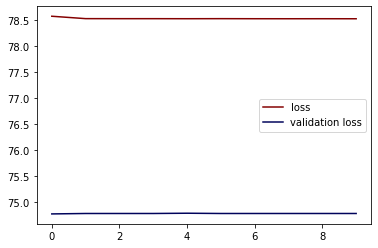

In [107]:
plt.plot (r.history['loss'], label='loss', color='#840000')
plt.plot (r.history['val_loss'], label='validation loss', color='#00035b')
plt.legend ()